# ChatGPT App Reviews-Sentiment Analysis 

Dataset is optained from kaggle. The dataset analysis is done using the general dataset analysis methods. It starts of with loading, followed by samll visualization then data preprocessing. After the initial preprocessing, word clouds are created to visualize the most frequent words associated with positive, negative, and neutral sentiments. These word clouds provide a quick overview of the commonly expressed sentiments in the reviews.  And finaly ends with model development were different algorthims are used and the best one is selected based on the accuracy, precision, recall and F1-score.

In [2]:
# Importing the import required libraries for the analysis.
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import nltk
import spacy
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


from nltk.corpus import stopwords
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the Chatgpt iphone app review dataset
df=pd.read_csv(r"D:\EXTRA PROJECT\Random Dataset\chatgpt_reviews.csv")

In [4]:
df.shape

(2292, 4)

In [5]:
df

,date,title,review,rating
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4
...,...,...,...,...
2287,2023-05-19 00:17:04,Andrew Justino Wilson 5/19/23,This has to be a beginning to something crazy ...,5
2288,2023-05-18 19:13:28,Superb AI,I’ve been using chat and have been a proud pre...,5
2289,2023-05-18 18:27:04,Fantastic App with Room for Enhancements,The ChatGPT iOS app is an outstanding product....,5
2290,2023-05-18 17:17:44,"Awesome technology, deplorable tactics",Sam Altman’s blatant attempt at regulatory cap...,2


In [6]:
df.columns

Index(['date', 'title', 'review', 'rating'], dtype='object')

The dataset consist of 4 columns. and 2292 rows of reviews data. Certain columns within the daatset is unnecessary and they will be removed during the future preprocessing.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2292 non-null   object
 1   title   2292 non-null   object
 2   review  2292 non-null   object
 3   rating  2292 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 71.8+ KB


In [8]:
df['rating'].value_counts().sort_index()

1     495
2     139
3     220
4     304
5    1134
Name: rating, dtype: int64

In [9]:
df['rating'].value_counts(normalize=True).mul(100).round(2).sort_index()

1    21.60
2     6.06
3     9.60
4    13.26
5    49.48
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='count'>

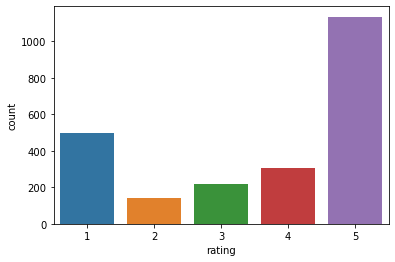

In [10]:
sns.countplot(df['rating'])

In [11]:
df.describe(include='object').T

,count,unique,top,freq
date,2292,2287,2023-05-18 17:20:00,2
title,2292,2058,Finally,13
review,2292,2257,Great,7


In [12]:
df.isnull().sum().sort_values(ascending=False)

date      0
title     0
review    0
rating    0
dtype: int64

In [13]:
# Combining the title and review colummn together into a single column 
df['complete_review'] = df['title'] +' .'+df['review']

In [14]:
df

,date,title,review,rating,complete_review
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,Much more accessible for blind users than the ...
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,"Much anticipated, wasn’t let down. .I’ve been ..."
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,"Almost 5 stars, but… no search function .This ..."
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,"4.5 stars, here’s why .I recently downloaded t..."
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,"Good, but Siri support would take it to the ne..."
...,...,...,...,...,...
2287,2023-05-19 00:17:04,Andrew Justino Wilson 5/19/23,This has to be a beginning to something crazy ...,5,Andrew Justino Wilson 5/19/23 .This has to be ...
2288,2023-05-18 19:13:28,Superb AI,I’ve been using chat and have been a proud pre...,5,Superb AI .I’ve been using chat and have been ...
2289,2023-05-18 18:27:04,Fantastic App with Room for Enhancements,The ChatGPT iOS app is an outstanding product....,5,Fantastic App with Room for Enhancements .The ...
2290,2023-05-18 17:17:44,"Awesome technology, deplorable tactics",Sam Altman’s blatant attempt at regulatory cap...,2,"Awesome technology, deplorable tactics .Sam Al..."


In [15]:
df['complete_review']

0       Much more accessible for blind users than the ...
1       Much anticipated, wasn’t let down. .I’ve been ...
2       Almost 5 stars, but… no search function .This ...
3       4.5 stars, here’s why .I recently downloaded t...
4       Good, but Siri support would take it to the ne...
                              ...                        
2287    Andrew Justino Wilson 5/19/23 .This has to be ...
2288    Superb AI .I’ve been using chat and have been ...
2289    Fantastic App with Room for Enhancements .The ...
2290    Awesome technology, deplorable tactics .Sam Al...
2291           I like how there r no limits thanks <33 ..
Name: complete_review, Length: 2292, dtype: object

In [16]:
#Drop some columns which we won't use for sentiment analysis of review
remove_cols = ['date','review','title']
df = df.drop(remove_cols,axis='columns')

In [17]:
df

,rating,complete_review
0,4,Much more accessible for blind users than the ...
1,4,"Much anticipated, wasn’t let down. .I’ve been ..."
2,4,"Almost 5 stars, but… no search function .This ..."
3,4,"4.5 stars, here’s why .I recently downloaded t..."
4,4,"Good, but Siri support would take it to the ne..."
...,...,...
2287,5,Andrew Justino Wilson 5/19/23 .This has to be ...
2288,5,Superb AI .I’ve been using chat and have been ...
2289,5,Fantastic App with Room for Enhancements .The ...
2290,2,"Awesome technology, deplorable tactics .Sam Al..."


In [18]:
# Converting all the reviews to lowercase for asy handlinng of the text data
df['complete_review'] = df['complete_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['complete_review'].head()

0    much more accessible for blind users than the ...
1    much anticipated, wasn’t let down. .i’ve been ...
2    almost 5 stars, but… no search function .this ...
3    4.5 stars, here’s why .i recently downloaded t...
4    good, but siri support would take it to the ne...
Name: complete_review, dtype: object

In [19]:
# Removig the puctuation from the text 
df['complete_review'] = df['complete_review'].str.replace('[^\w\s]','')

In [20]:
# Removing all the emojes in the review

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['complete_review'] = df['complete_review'].apply(lambda x: remove_emoji(x))

In [21]:
# Removing the stopwords

stop = stopwords.words('english')
df['complete_review'] = df['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [22]:
# Applyig Lemetaization

def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['complete_review']= df['complete_review'].apply(space)

In [23]:
# Removing certain words within the review that doesnt convey any sentiment
# Eg: 'chatgpt','gpt','iphone'.....etc

words_to_remove = ['chatgpt','app','chatgpts','chat','gpt','iphone','ipad','gpt4','phone','number','ai','use','io']
df['complete_review'] = df['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in words_to_remove))

In [24]:
# Map ratings to positive, negative & neutral sentiment
  # 0 will represent negative sentiment
  # 1 will represent neutral sentiment
  # 2 will represent positive sentiment

df['sentiment'] = df['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
df.head(5)

,rating,complete_review,sentiment
0,4,much accessible blind user web version point I...,2
1,4,much anticipate be not let I ve user since ini...,2
2,4,almost 5 star search function would almost per...,2
3,4,45 star here recently download overall great p...,2
4,4,good siri support would take next level apprec...,2


In [25]:
# To check the percentage of each class of review 

df['sentiment'].value_counts(normalize=True).mul(100).round(2)

2    62.74
0    27.66
1     9.60
Name: sentiment, dtype: float64

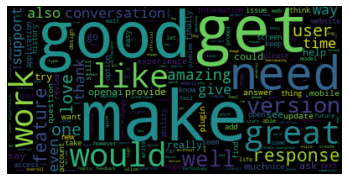

In [26]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in df.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# positive negative & neutral sentiment:
positive = df[df['sentiment'] == 2]
negative = df[df['sentiment'] == 0]
neutral = df[df['sentiment'] == 1]

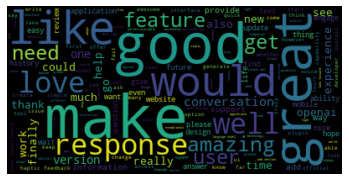

In [28]:
#Positive Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in positive.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()  

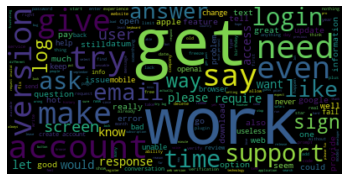

In [29]:
#Negative Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in negative.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

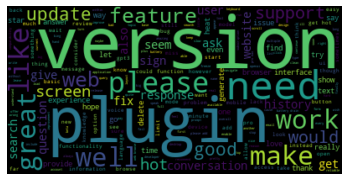

In [30]:
#Neutral Sentiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in neutral.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bag of words vectorization

In [31]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = cv.fit_transform(df['complete_review'])
y = df['sentiment']

In [32]:
# Synthetic Majority Oversampling Technique
# Instantiate the SMOTE object
smote = SMOTE()

# Perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(X, y)

In [33]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,
                                                  y_oversampled,
                                                  test_size=0.15,
                                                  random_state=17,stratify=y_oversampled)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3666, 5152)
(648, 5152)
(3666,)
(648,)


## Model Development 

In [34]:
#  logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.48      0.74      0.58       141
           1       0.87      0.57      0.69       330
           2       0.70      0.85      0.77       177

    accuracy                           0.68       648
   macro avg       0.68      0.72      0.68       648
weighted avg       0.74      0.68      0.69       648



In [35]:
# Random forest classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.43      0.78      0.55       120
           1       0.90      0.57      0.70       345
           2       0.71      0.84      0.77       183

    accuracy                           0.68       648
   macro avg       0.68      0.73      0.67       648
weighted avg       0.76      0.68      0.69       648



In [36]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Set the objective function for multi-class classification
    'num_class': 3,      # Number of classes in the dataset
    'eval_metric': 'merror',        # Evaluation metric (multi-class classification error rate)
    'eta': 0.4,                    # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of features when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
preds = model.predict(dtest)
pred_labels = [int(pred) for pred in preds]

print(classification_report(pred_labels, y_test))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       190
           1       0.87      0.90      0.89       208
           2       0.90      0.78      0.83       250

    accuracy                           0.85       648
   macro avg       0.85      0.85      0.85       648
weighted avg       0.85      0.85      0.85       648



The XGBoost algorithm had the better result compared to other algorithms. It had the highest accuracy of 85%. The recall score, F1-score and precision was also very high for XBoost algorithm. 